In [232]:
import pandas as pd
import seaborn as sns
import statsmodels.tsa.api as smt  
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
import requests
import io
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [233]:
Newyork = pd.read_csv("Newyork.csv")
Newyork.head(2)
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.width', 1000)

In [234]:
Newyork.shape

(48377, 106)

In [235]:
Oakland = pd.read_csv("Oakland.csv")
Oakland.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3083,https://www.airbnb.com/rooms/3083,20190920213019,2019-09-20,B-Love's Guest House Room #2,This is a beautiful spacious Guest House with ...,"Hello, my name is ""B"" and I’m a Bay Area artis...",This is a beautiful spacious Guest House with ...,none,The neighborhood is in a historic district wit...,NaN,BART is 4 blocks away. The are also buses clo...,Guest have access to kitchen and shared bathro...,I live upstairs and guest may see me doing off...,As the home owner I’m looking for guest that a...,NaN,NaN,https://a0.muscache.com/im/pictures/8ba4cc15-0...,NaN,3518,https://www.airbnb.com/users/show/3518,Traci,2008-10-08,"Oakland, California, United States",My motto in life comes from one of my favorite...,within a few hours,91%,NaN,f,https://a0.muscache.com/im/users/3518/profile_...,https://a0.muscache.com/im/users/3518/profile_...,Prescott,7,7,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Oakland, CA, United States",West Oakland,Prescott,NaN,Oakland,CA,94607.0,"East Bay, CA","Oakland, CA",US,United States,37.80832,-122.29300,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",NaN,$65.00,$400.00,NaN,$0.00,$70.00,1,$20.00,3,30,3,3,30,30,3.0,30.0,today,t,11,41,71,161,2019-09-20,37,11,2014-08-02,2019-08-14,91.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,{OAKLAND},f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.59
1,5739,https://www.airbnb.com/rooms/5739,20190920213019,2019-09-20,Mod Studio,"The Mod Studio is a cozy, clean and convenient...",Great private pad with room to relax. 15 min ...,"The Mod Studio is a cozy, clean and convenient...",none,"We love the proximity to great restaurants, Wh...",NaN,Public transit underground to SF (BART) is a p...,NaN,As much or as little as schedules and your pre...,The studio may only be rented up to 6 weeks pr...,NaN,NaN,https://a0.muscache.com/im/pictures/116963/362...,NaN,9276,https://www.airbnb.com/users/show/9276,Leah And Gyorgy,2009-03-06,"Oakland, California, United States",We are a conscientious couple and will take go...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/9276/profile_...,https://a0.muscache.com/im/users/9276/profile_...,Harrison Street/Oakland Avenue,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,

In [236]:
Oakland.shape

(3236, 106)

In [237]:
df = Newyork.append(Oakland)

In [238]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,W

In [239]:
df.shape

(51613, 106)

In [240]:
column_names = df.columns
print(column_names)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], dtype='object', length=106)


In [241]:
# id - listing identifier that can be used to create a join with other files
# last_scraped - we will use it to calculate reviews_per_month
# listing_url - interesting if we want to analyse the pictures as well but out of scope otherwise
# scrape_id - same for all the records
# name - textual description already extracted as continous variables in other columns
# summary - as above
# space - as above
# description - as above
# experiences_offered - contains only none value
# neighborhood_overview - requires lot of preprocessing to turn into useful a feature
# notes - requires lot of preprocessing to turn into useful a feature
# transit - requires lot of preprocessing to turn into useful a feature
# access - requires lot of preprocessing to turn into useful a feature
# interaction - requires lot of preprocessing to turn into useful a feature
# house_rules - requires lot of preprocessing to turn into useful a feature
# thumbnail_url - contains no values
# medium_url - contains no values
# picture_url - interesting if we want to analyse the pictures as well but out of scope otherwise
# xl_picture_url - contains no values
# host_id - id that is not used anywhere else

In [242]:
df.drop('listing_url', inplace=True, axis=1) # dropping as it is not usable
df.drop('scrape_id', inplace=True, axis=1) # dropping as it is not usable
df.drop('name',inplace=True, axis=1) # dropping as it is not usable
df.drop('summary',inplace=True, axis=1) # dropping as it is not usable
df.drop('description',inplace=True, axis=1) # dropping as it is not usable
df.drop('experiences_offered',inplace=True, axis=1) # dropping as it is not usable
df.drop('neighborhood_overview',inplace=True, axis=1) # dropping as it is not usable
df.drop('notes',inplace=True, axis=1) # dropping as it is not usable
df.drop('access',inplace=True, axis=1) # dropping as it is not usable
df.drop('interaction',inplace=True, axis=1) # dropping as it is not usable
df.drop('house_rules',inplace=True, axis=1) # dropping as it is not usable
df.drop('thumbnail_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('medium_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('xl_picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_id',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_location',inplace=True, axis=1) # dropping as it is not usable

In [243]:
df.head()

,id,last_scraped,space,transit,host_url,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/7192/profile_...,https://a0.muscache.com/im/users/7192/profile_...,East Harlem,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"New York, NY, United States",East Harlem,East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",US,United States,40.79851,-73.94399,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,

In [244]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_url', 'host_name', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'm

In [245]:
# From the next 20 columns we will keep the following:

# host_name - can be used to identify words associated with the host in reviews
# host_since - can be used to calculate host experience based on duration since the first listing
# host_location - we can use it to establish if host is local or not
# host_about - since its only a text we will count number of characters
# host_is_superhost - categorical t or f - describing highly rated and relaible hosts - https://www.airbnb.co.uk/superhost
# host_has_profile_pic - categorical t or f - profiles with pictures are seen as more credible
# host_identity_verified - categorical t or f - another credibility metric

# And remove all the below:

# host_url - host profile is out of scope
# host_response_time - this value could be useful but contains high percentage of N/A and is contained within score_communication
# host_response_rate - same as above
# host_acceptance_rate - eaither NA or blank
# host_thumbnail_url - host picture is out of scope
# host_picture_url - host picture is out of scope
# host_neighbourhood - host_location to be instead
# host_listings_count - we will use more accurate calculated_host_listings_count
# host_total_listings_count - as above
# host_verifications - list of host verification methods - information already contained in host_identity_verified
# street - neighbourhood_cleansed will be used instead
# neighbourhood - neighbourhood_cleansed will be used instead

In [246]:
df.drop('host_url', inplace=True, axis=1) # dropping as it is not usable
df.drop('host_response_time', inplace=True, axis=1) # dropping as it is not usable
df.drop('host_response_rate',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_acceptance_rate',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_thumbnail_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_neighbourhood',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_listings_count',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_total_listings_count',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_verifications',inplace=True, axis=1) # dropping as it is not usable
df.drop('neighbourhood',inplace=True, axis=1) # dropping as it is not usable

In [247]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",US,United States,40.79851,-73.94399,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,New York,NY,10016,New York,"New York, NY",US,United States,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",NaN,$200.00,NaN,NaN,$300.00,$125.00,2,$100.00,3,21,3,3,21,21,3.0,21.0,today,t,3,3,13,13,2019-09-13,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyves

In [248]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_r

In [249]:
# From the next 20 columns we will keep the following:

# neighbourhood_cleansed - we will use only for visualisation due to number of neighbourhoods while we use gruoupped neighbourhoods instead
# neighbourhood_group_cleansed - categorical value which will be used to identify most popular parts of Barclona
# latitude - we will use it later to visualise the data on the map
# longitude - we will use it later to visualise the data on the map
# property_type - categorical variable
# room_type - categorical variable
# accommodates - discrete value describing property
# bathrooms - another discrete value describing property
# bedrooms - another discrete value describing property
# beds - another discrete value describing property
# bed_type - categorical value describing property
# amenities - due to number of unique features (over 100) we will only concentrate on the total number of amenities
# And remove all the below:

# city - we already know the city
# state - and region being Catalonia
# zipcode - we will use neighbourhood
# market - it is mainly Barcelona
# smart_location - it is mainly Barcelona
# country_code - we already know the country
# country - as above
# is_location_exact - unimportant as it could be inacurate up to 150 meters http://insideairbnb.com/about.html#disclaimers

In [250]:
df.drop('city', inplace=True, axis=1) # dropping as it is not usable
df.drop('state', inplace=True, axis=1) # dropping as it is not usable
df.drop('zipcode',inplace=True, axis=1) # dropping as it is not usable
df.drop('market',inplace=True, axis=1) # dropping as it is not usable
df.drop('smart_location',inplace=True, axis=1) # dropping as it is not usable
df.drop('country_code',inplace=True, axis=1) # dropping as it is not usable
df.drop('country',inplace=True, axis=1) # dropping as it is not usable
df.drop('is_location_exact',inplace=True, axis=1) # dropping as it is not usable

In [251]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",NaN,$200.00,NaN,NaN,$300.00,$125.00,2,$100.00,3,21,3,3,21,21,3.0,21.0,today,t,3,3,13,13,2019-09-13,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",NaN,$60.00,NaN,NaN,$450.00,$0.00,1,$30.00,45,730,45,45,730,730,45.0,730.0,20 months ago,t,0,0,0,0,2019-09-13,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_wit

In [252]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_ch

In [253]:
# From the next 20 columns we will keep the following:

# price - price per night for number of included guests
# security_deposit - another continous value assiociated with the cost
# cleaning_fee - additional cost at the top of rent
# guests_included - descrete value which we will use to evaluate the cost per person
# extra_people - cost of additional person per night
# minimum_nights - another discrete value that is cost related. Listing with high value of minimum nights are likely sublettings
# first_review - we will use it to calculate reviews_per_month
# last_review - we will use this field to filter out no longer active listings
# number_of_reviews - total number of reviews in entire listing history
# And remove all the below:

# square_feet - could be used to evaluate the property size but most of the values are missing
# weekly_price - mostly blank so we will use price instead
# monthly_price - mostly blank so we will use price instead
# maximum_nights - most of the values are above 30 days suggesting its used as an open bracket
# calendar_updated - we are not interested in future data that is a subject to daily updates
# has_availability - as above
# availability_30 - as above
# availability_60 - as above
# availability_90 - as above
# availability_365 - as above
# calendar_last_scraped - as above

In [254]:
df.drop('square_feet', inplace=True, axis=1) # dropping as it is not usable
df.drop('weekly_price', inplace=True, axis=1) # dropping as it is not usable
df.drop('monthly_price',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('calendar_updated',inplace=True, axis=1) # dropping as it is not usable
df.drop('has_availability',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_30',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_60',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_90',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_365',inplace=True, axis=1) # dropping as it is not usable
df.drop('calendar_last_scraped',inplace=True, axis=1) # dropping as it is not usable

In [255]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,3,3,7,7,3.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,1,1,730,730,1.0,730.0,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,10,10,120,120,10.0,120.0,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,3,3,21,21,3.0,21.0,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,45,45,730,730,45.0,730.0,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.39


In [256]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
   

In [257]:
# From the final set of columns we will keep the following:

# review_scores_accuracy - discrete value - numbers between 2 and 10
# review_scores_cleanliness - discrete value - numbers between 2 and 10
# review_scores_checkin - discrete value - numbers between 2 and 10
# review_scores_communication - discrete value - numbers between 2 and 10
# review_scores_location - discrete value - numbers between 2 and 10
# review_scores_value - discrete value - numbers between 2 and 10
# instant_bookable - categorical value - t or false
# cancellation_policy - ordinal value with 5 categories that can be ordered from lowest to highest level of flexibility
# require_guest_profile_picture - categorical value - t or false
# require_guest_phone_verification categorical value - t or false
# calculated_host_listings_count - continious value which is actual number of host listings - another metric to measure host experience or to distinguish buisness from individual
# And remove all the below:

# review_scores_rating - this value is calculated as weighted sum of other scores
# requires_license - all values are t
# license - textual value that is mostly null
# jurisdiction_names - contains only nulls
# is_business_travel_ready - contains one value of f
# reviews_per_month - we will re-calculate this field using our formula

In [258]:
df.drop('review_scores_rating', inplace=True, axis=1) # dropping as it is not usable
df.drop('requires_license', inplace=True, axis=1) # dropping as it is not usable
df.drop('license',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_minimum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_minimum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_nights_avg_ntm',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_nights_avg_ntm',inplace=True, axis=1) # dropping as it is not usable
df.drop('jurisdiction_names',inplace=True, axis=1) # dropping as it is not usable
df.drop('is_business_travel_ready',inplace=True, axis=1) # dropping as it is not usable
df.drop('reviews_per_month',inplace=True, axis=1) # dropping as it is not usable

In [259]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,0,1,0
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,67,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1,1,0,0
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1,1,0,0
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,10,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1,1,0,0
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,0,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1,0,1,0


In [260]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], dtype='object')


In [261]:
df.drop('number_of_reviews_ltm', inplace=True, axis=1) # dropping as it is not usable
df.drop('street', inplace=True, axis=1) # dropping as it is not usable
df.drop('transit',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_entire_homes',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_private_rooms',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_shared_rooms',inplace=True, axis=1) # dropping as it is not usable
df.drop('space',inplace=True, axis=1) # dropping as it is not usable

In [262]:
df.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,3647,2019-09-13,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
2,5022,2019-09-13,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
4,5121,2019-09-13,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1


In [263]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count'], dtype='object')


In [264]:
df_sel = df.copy()

In [265]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,3647,2019-09-13,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
2,5022,2019-09-13,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
4,5121,2019-09-13,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1


In [266]:
df_sel.drop(df_sel[df_sel['number_of_reviews'] <= 0].index, inplace = True) 
# dropping all values less than or equal to 0 as it is equal to NAN or NA

In [267]:
df_sel['number_of_reviews'].unique()

array([279,   9,  75,  49, 443, 118,  94, 161,  54, 198, 171, 116,  27,
       160, 203, 277,  62, 134,  74,  96,  21,  58,  30, 248,  95, 172,
        67, 239, 218, 253,  15,  25,  84, 100,  11, 258,  12, 138, 121,
        80, 349,  19, 108,  20, 298, 142,  23,  44,   5, 143, 192,   4,
       357, 155, 110, 197,  50,  52, 109, 146,  63,  55,  73,  17,  61,
       201, 178, 175,  22, 168, 123,   1,  31, 139,  46, 339,  88, 164,
        29, 177, 342, 469,   7,  38, 331, 356,  16,  14, 156, 266,  78,
       194,   3, 428, 238, 127, 243,  28,  34, 135, 240, 206, 322,   2,
       305,  59, 234, 193,  87, 219,  18, 222, 126,  33,  53, 128,  51,
       208, 113, 290, 378,  10,   6, 369, 236, 152, 211, 261, 115, 130,
        85,  37, 213,  71, 225, 205,  98, 475,  82, 184,  92, 151,  81,
       183, 125, 106, 360, 448,  45, 259, 145,  36, 292, 233,  64, 227,
        72,  56,  99,  65,  48, 122,  40,  32,  70,  69,  26, 209, 232,
       295, 409, 185,   8,  35,  66, 398, 230, 158, 228, 381, 10

In [268]:
df_sel['security_deposit'].isnull().sum()

12342

In [269]:
df_sel['cleaning_fee'].isnull().sum()

6515

In [270]:
df_sel['cleaning_fee'] = df_sel ['cleaning_fee'].fillna(0)

In [271]:
df_sel['cleaning_fee'].isnull().sum()

0

In [272]:
df_sel['security_deposit'] = df_sel ['security_deposit'].fillna(0)

In [273]:
df_sel['security_deposit'].isnull().sum()

0

In [274]:
df_sel['host_about'].isnull().sum()

14557

In [275]:
df_sel['host_about'] = df_sel.host_about.fillna('')

In [276]:
df_sel['host_about'].isnull().sum()

0

In [277]:
df_sel1 = df_sel.copy()

In [278]:
df_sel = df_sel.dropna()

In [279]:
df_sel.isnull().sum()

id                                  0
last_scraped                        0
host_name                           0
host_since                          0
host_about                          0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
number_of_re

In [280]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,0,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,f,t,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",$79.00,0,$15.00,1,$12.00,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,f,t,t,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",$79.00,0,0,1,$0.00,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,t,t,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,f,t,t,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$116.00,$500.00,$75.00,2,$15.00,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1


In [281]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_sel['host_is_superhost']= label_encoder.fit_transform(df_sel['host_is_superhost'])

In [282]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,0,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,t,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",$79.00,0,$15.00,1,$12.00,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,t,t,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",$79.00,0,0,1,$0.00,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,t,t,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,t,t,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$116.00,$500.00,$75.00,2,$15.00,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1


In [283]:
df_sel['host_has_profile_pic'] = label_encoder.fit_transform(df_sel['host_has_profile_pic'])

In [284]:
df_sel['host_identity_verified'] = label_encoder.fit_transform(df_sel['host_identity_verified'])

In [285]:
df_sel['instant_bookable'] = label_encoder.fit_transform(df_sel['instant_bookable'])

In [286]:
df_sel['require_guest_profile_picture'] = label_encoder.fit_transform(df_sel['require_guest_profile_picture'])

In [287]:
df_sel['require_guest_phone_verification'] = label_encoder.fit_transform(df_sel['require_guest_phone_verification'])

In [288]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,0,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,moderate,0,0,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,moderate,1,1,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",$79.00,0,$15.00,1,$12.00,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,strict_14_with_grace_period,0,0,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",$79.00,0,0,1,$0.00,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,1,1,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$116.00,$500.00,$75.00,2,$15.00,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,1


In [289]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37214 entries, 1 to 48176
Data columns (total 40 columns):
id                                  37214 non-null int64
last_scraped                        37214 non-null object
host_name                           37214 non-null object
host_since                          37214 non-null object
host_about                          37214 non-null object
host_is_superhost                   37214 non-null int32
host_has_profile_pic                37214 non-null int32
host_identity_verified              37214 non-null int32
neighbourhood_cleansed              37214 non-null object
neighbourhood_group_cleansed        37214 non-null object
latitude                            37214 non-null float64
longitude                           37214 non-null float64
property_type                       37214 non-null object
room_type                           37214 non-null object
accommodates                        37214 non-null int64
bathrooms               

In [290]:
df_sel.select_dtypes(include='object').columns

Index(['last_scraped', 'host_name', 'host_since', 'host_about', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'first_review', 'last_review', 'cancellation_policy'], dtype='object')

In [291]:
df_sel['price']=df_sel['price'].str.replace('$','')
df_sel['price']=df_sel['price'].str.replace(',','')
df_sel['price']=df_sel['price'].str.replace('.','').astype(float)

In [292]:
# extra_people - conversion from $ to numeric values
df_sel['extra_people']=df_sel['extra_people'].str.replace('$','')
df_sel['extra_people']=df_sel['extra_people'].str.replace(',','')
df_sel['extra_people']=df_sel['extra_people'].str.replace('.','').astype(float)

In [293]:
# security_deposit - conversion from $ to numeric values
df_sel['security_deposit']=df_sel['security_deposit'].str.replace('$','')
df_sel['security_deposit']=df_sel['security_deposit'].str.replace(',','')
df_sel['security_deposit']=df_sel['security_deposit'].str.replace('.','').astype(float)
df_sel['security_deposit'] = df_sel ['security_deposit'].fillna(0)

In [294]:
# cleaning_fee - conversion from $ to numeric values
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace('$','')
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace(',','')
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace('.','').astype(float)
df_sel['cleaning_fee'] = df_sel ['cleaning_fee'].fillna(0)

In [295]:
# listing_duration = 
df_sel['last_review']= pd.to_datetime(df_sel['last_review'])
df_sel['first_review']= pd.to_datetime(df_sel['first_review'])
df_sel['listing_duration'] = df_sel['last_review'] - df_sel['first_review']

In [296]:
# hosting_duration = 
df_sel['host_since']= pd.to_datetime(df_sel['host_since'])
df_sel['hosting_duration'] = df_sel['last_review'] - df_sel['host_since']

In [297]:
# host_about_len = 
df_sel['host_about_len']=df_sel['host_about'].str.replace('NA','0')

In [298]:
df.drop('host_about',inplace=True, axis=1) # dropping as it is not usable

In [299]:
# price_per_person - (price/accommodates)
df_sel['price_per_person'] =df_sel['price'] / df_sel['accommodates']

In [300]:
df_sel.head(5)

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,listing_duration,hosting_duration,host_about_len,price_per_person
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.0,0.0,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,moderate,0,0,1,1794 days,3917 days,Laid-back bi-coastal actor/professor/attorney.,2966.666667
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.0,12500.0,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,moderate,1,1,1,3744 days,3821 days,"I'm an artist, writer, traveler, and a native ...",10000.000000
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,0.0,1500.0,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,strict_14_with_grace_period,0,0,1,3765 days,3829 days,I used to work for a financial industry but no...,3950.000000
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,0.0,0.0,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,1,1,1,2874 days,3088 days,Welcome to family life with my oldest two away...,7900.000000
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.0,7500.0,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,1,2669 days,2686 days,I'm a writer who came to NYC for graduate scho...,5800.000000


In [301]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,listing_duration,hosting_duration,host_about_len,price_per_person
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.0,0.0,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,moderate,0,0,1,1794 days,3917 days,Laid-back bi-coastal actor/professor/attorney.,2966.666667
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.0,12500.0,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,moderate,1,1,1,3744 days,3821 days,"I'm an artist, writer, traveler, and a native ...",10000.000000
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,0.0,1500.0,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,strict_14_with_grace_period,0,0,1,3765 days,3829 days,I used to work for a financial industry but no...,3950.000000
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,0.0,0.0,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,1,1,1,2874 days,3088 days,Welcome to family life with my oldest two away...,7900.000000
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.0,7500.0,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,1,2669 days,2686 days,I'm a writer who came to NYC for graduate scho...,5800.000000


In [302]:
df_sel['last_scraped']= pd.DatetimeIndex(df_sel.last_scraped)
df_sel['first_review']= pd.DatetimeIndex(df_sel.first_review)
df_sel['last_review']= pd.DatetimeIndex(df_sel.last_review)
df_sel['host_since']= pd.DatetimeIndex(df_sel.host_since)

In [303]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,listing_duration,hosting_duration,host_about_len,price_per_person
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.0,0.0,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,moderate,0,0,1,1794 days,3917 days,Laid-back bi-coastal actor/professor/attorney.,2966.666667
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.0,12500.0,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,moderate,1,1,1,3744 days,3821 days,"I'm an artist, writer, traveler, and a native ...",10000.000000
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,0.0,1500.0,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,strict_14_with_grace_period,0,0,1,3765 days,3829 days,I used to work for a financial industry but no...,3950.000000
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,0.0,0.0,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,1,1,1,2874 days,3088 days,Welcome to family life with my oldest two away...,7900.000000
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.0,7500.0,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,1,2669 days,2686 days,I'm a writer who came to NYC for graduate scho...,5800.000000


In [304]:
X = df_sel.drop(['cancellation_policy','bed_type','room_type','neighbourhood_group_cleansed','property_type','last_scraped','host_name','host_since','host_about','neighbourhood_cleansed','amenities','first_review','last_review','listing_duration','hosting_duration','host_about_len','price'], axis=1)
y = df_sel['price']

In [305]:
X.head(5)

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person
1,3831,0,1,1,40.68514,-73.95976,3,1.0,1.0,4.0,50000.0,0.0,1,0.0,1,279,9.0,9.0,10.0,9.0,10.0,9.0,0,0,0,1,2966.666667
3,5099,0,1,0,40.74767,-73.97500,2,1.0,1.0,1.0,30000.0,12500.0,2,10000.0,3,75,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,10000.000000
5,5178,0,1,0,40.76489,-73.98493,2,1.0,1.0,1.0,0.0,1500.0,1,1200.0,2,443,8.0,7.0,9.0,9.0,10.0,8.0,0,0,0,1,3950.000000
6,5203,0,1,1,40.80178,-73.96723,1,1.0,1.0,1.0,0.0,0.0,1,0.0,2,118,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,1,7900.000000
7,5222,0,1,1,40.72764,-73.97949,2,1.0,1.0,1.0,50000.0,7500.0,2,1500.0,30,94,9.0,9.0,10.0,10.0,10.0,9.0,0,0,0,1,5800.000000


In [306]:
# X = df_sel.drop(['last_scraped','host_name','host_since','host_about','neighbourhood_cleansed','amenities','first_review','last_review','listing_duration','hosting_duration','host_about_len','price'], axis=1)
# y = df_sel['price']

In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26049, 27)
(11165, 27)
(11165,)


In [308]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7766927471107543
R^2 score for test: 0.6323226141212466


In [309]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3679.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:17   Log-Likelihood:            -3.9687e+05
No. Observations:               37214   AIC:                         7.938e+05
Df Residuals:                   37186   BIC:                         7.940e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -1.881e+06   1.02e+05    -18.401      0.000   -2.08e+06   -1.68e+06
id                               -2.497e-06   5.94e-06     -0.420      0.674   -1.41e-05    9.14e-06
host_is_superhost                  156.8335    138.447      1.133      0.257    -114.526     428.193
host_has_profile_pic               472.9283   1278.541      0.370      0.711   -2033.048    2978.905
host_identity_verified              76.4759    118.716      0.644      0.519    -156.211     309.163
latitude                          9439.6987    982.823      9.605      0.000    7513.338    1.14e+04
longitude                        -2.004e+04   1209.642    -16.564      0.000   -2.24e+04   -1.77e+04
accommodates                      3904.8761     50.304     77.625      0.000    3806.279    4003.473
bathrooms                         4024.9035    142.537     28.238      0.000    3745.526    4304.281
bedrooms                          1045.1752    106.003      9.860      0.000     837.406    1252.945
beds                              -906.9547     76.607    -11.839      0.000   -1057.107    -756.803
security_deposit                     0.0177      0.001     11.854      0.000       0.015       0.021
cleaning_fee                         0.2833      0.013     22.010      0.000       0.258       0.308
guests_included                   -395.7318     59.405     -6.662      0.000    -512.167    -279.296
extra_people                        -0.0309      0.023     -1.328      0.184      -0.077       0.015
minimum_nights                     -19.8934      3.008     -6.613      0.000     -25.790     -13.997
number_of_reviews                   -7.6785      1.255     -6.121      0.000     -10.137      -5.220
review_scores_accuracy             118.3321    100.224      1.181      0.238     -78.110     314.774
review_scores_cleanliness          277.1995     67.874      4.084      0.000     144.165     410.235
review_scores_checkin             -396.0504    104.646     -3.785      0.000    -601.159    -190.942
review_scores_communication       -120.2756    106.899     -1.125      0.261    -329.801      89.250
review_scores_location             606.7596     85.185      7.123      0.000     439.795     773.724
review_scores_value               -123.0822     91.165     -1.350      0.177    -301.768      55.603
instant_bookable                   -17.7829    118.367     -0.150      0.881    -249.786     214.220
require_guest_profile_picture     1027.9644    576.214      1.784      0.074    -101.430    2157.359
require_guest_phone_verification  1221.9898    553.284      2.209      0.027     137.537    2306.442
calculated_host_listings_count       7.9776      1.734      4.600      0.000       4.579      11.376
price_per_person                     1.6231      0.00

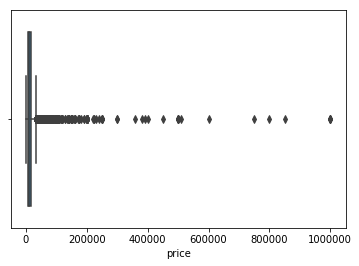

In [310]:
sns.boxplot(df_sel['price'])

In [311]:
df_sel['price'].describe()

count      37214.000000
mean       14128.693502
std        19845.833992
min            0.000000
25%         6800.000000
50%        10000.000000
75%        16900.000000
max      1000000.000000
Name: price, dtype: float64

In [312]:
UCL = 16900.000000 + 1.5 * ( 16900.000000-6800.000000)
LCL = 6800.000000 - 1.5 * ( 16900.000000-6800.000000)
print('UCL :', UCL)
print('LCL :', LCL)

UCL : 32050.0
LCL : -8350.0


In [313]:
df_sel11 = df_sel[df_sel['price']>UCL]
print(df_sel11.shape)
df_sel12 = df_sel[df_sel['price']<LCL]
df_sel12.shape

(1899, 44)


(0, 44)

In [314]:
correlation = df_sel.corr()
correlation

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person
id,1.000000,-0.024283,0.000960,-0.400949,-0.014619,0.118669,0.042597,0.038759,0.015769,0.035483,-0.011597,-0.101836,-0.030857,0.008486,-0.033273,-0.067544,-0.328434,-0.038126,0.012550,-0.056673,-0.073146,0.035818,-0.000650,0.293582,-0.173828,-0.183253,0.095891,-0.030688
host_is_superhost,-0.024283,1.000000,-0.006796,0.010137,-0.027812,0.048115,0.050743,0.000095,0.035872,0.048303,0.014896,0.048428,0.069024,0.084743,0.082892,-0.021139,0.290463,0.184510,0.230241,0.140392,0.143418,0.086129,0.179517,0.033585,0.041875,0.044945,0.119484,-0.010679
host_has_profile_pic,0.000960,-0.006796,1.000000,0.035978,-0.010693,-0.001624,0.002335,0.001060,-0.000968,-0.001656,-0.001648,-0.020465,0.003933,0.005815,0.002759,0.002454,-0.001268,0.018108,0.014219,0.020818,0.017934,0.003825,0.016725,-0.005017,-0.001613,-0.000954,0.005784,-0.003922
host_identity_verified,-0.400949,0.010137,0.035978,1.000000,-0.021423,-0.099235,-0.027812,-0.033687,-0.013382,-0.040047,0.018207,0.062599,0.029445,-0.016851,-0.003737,0.027276,0.101281,0.072838,0.023228,0.067469,0.086644,0.019257,0.057336,-0.194040,0.087331,0.091919,-0.093699,0.028152
latitude,-0.014619,-0.027812,-0.010693,-0.021423,1.000000,0.083146,-0.054690,-0.068886,-0.083117,-0.058259,0.031241,0.009832,0.007787,-0.062484,0.005156,0.026675,-0.007165,-0.021710,-0.015660,-0.022006,-0.008165,0.042926,-0.030117,0.011481,0.002790,0.000999,0.002705,0.043734
longitude,0.118669,0.048115,-0.001624,-0.099235,0.083146,1.000000,-0.004779,0.006990,0.034297,0.016119,-0.152045,-0.092805,-0.169113,0.029367,0.005017,-0.056805,0.056777,-0.006347,0.016830,0.008351,-0.017134,-0.181417,0.016132,0.072814,-0.020750,-0.024354,-0.095900,-0.112011
accommodates,0.042597,0.050743,0.002335,-0.027812,-0.054690,-0.004779,1.000000,0.340409,0.661658,0.755519,0.360866,0.171795,0.485683,0.600711,0.106559,-0.017018,0.067023,-0.022674,0.028955,0.003582,-0.016624,-0.017773,-0.035306,0.037927,-0.006300,0.005609,0.041230,-0.075720
bathrooms,0.038759,0.000095,0.001060,-0.033687,-0.068886,0.006990,0.340409,1.000000,0.414865,0.373990,0.225702,0.105876,0.234070,0.224080,0.053655,0.022599,-0.025910,-0.038074,-0.026889,-0.019598,-0.046108,-0.035362,-0.021422,0.016380,-0.002298,-0.001096,0.017223,0.003982
bedrooms,0.015769,0.035872,-0.000968,-0.013382,-0.083117,0.034297,0.661658,0.414865,1.000000,0.665359,0.279974,0.144706,0.383908,0.471993,0.102781,-0.008533,0.021509,-0.009727,0.018067,0.013668,-0.003850,-0.034963,0.000041,0.010927,0.005766,0.010862,-0.026231,-0.034303
beds,0.035483,0.048303,-0.001656,-0.040047,-0.058259,0.016119,0.755519,0.373990,0.665359,1.000000,0.270540,0.139880,0.403152,0.517270,0.111603,-0.004609,0.054255,-0.032997,0.009797,-0.002466,-0.024878,-0.030924,-0.035115,0.029358,-0.000008,0.005741,0.027126,-0.050965


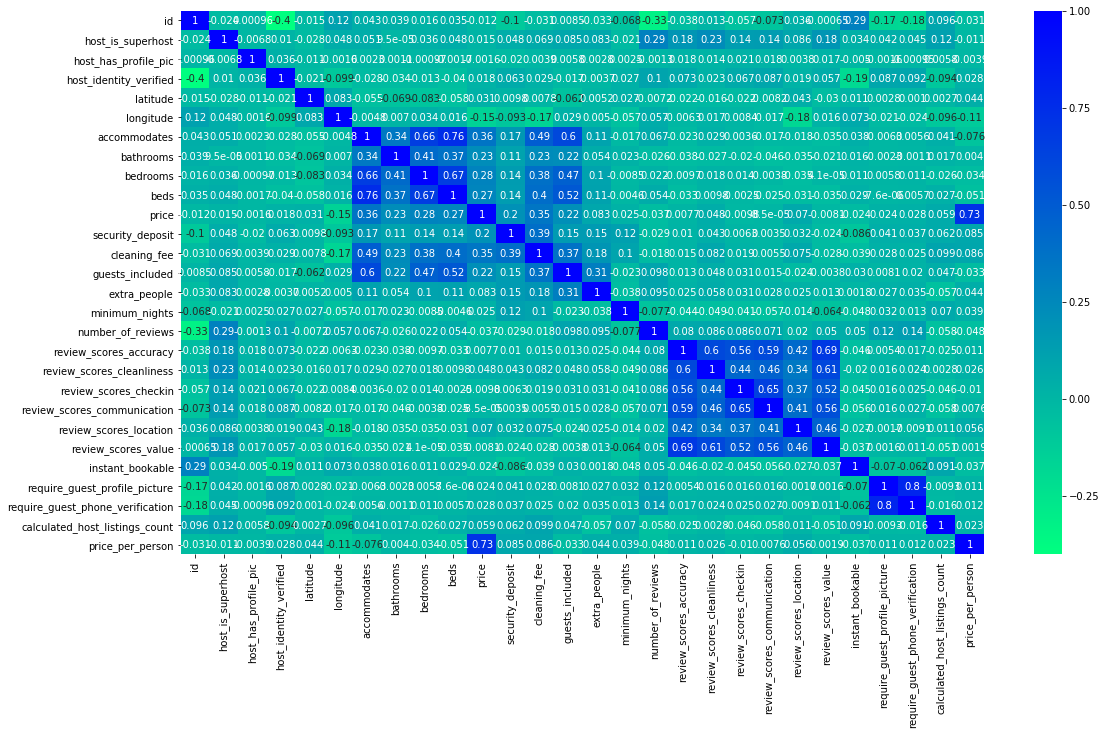

In [315]:
plt.figure(figsize=(18,10))
sns.heatmap(correlation,annot=True,cmap = 'winter_r')
plt.show()

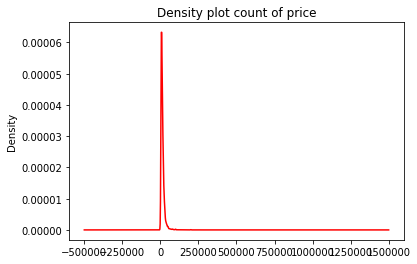

In [316]:
df_sel.price.plot(kind = 'kde', title = 'Density plot count of price', color= 'red');

In [317]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [318]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [319]:
OL = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     3352.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:30   Log-Likelihood:            -2.7295e+05
No. Observations:               26049   AIC:                         5.460e+05
Df Residuals:                   26021   BIC:                         5.462e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [320]:
checkVIF(OL)

,Features,VIF
0,const,3657099.74
7,accommodates,3.23
10,beds,2.74
25,require_guest_phone_verification,2.68
24,require_guest_profile_picture,2.67
17,review_scores_accuracy,2.49
22,review_scores_value,2.45
9,bedrooms,2.20
20,review_scores_communication,2.17
19,review_scores_checkin,1.97


In [321]:
OL = X_train.drop(["beds"], axis = 1,inplace=True)

In [322]:
OL = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     3469.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:32   Log-Likelihood:            -2.7299e+05
No. Observations:               26049   AIC:                         5.460e+05
Df Residuals:                   26022   BIC:                         5.463e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [323]:
checkVIF(OL)

,Features,VIF
0,const,3656787.21
24,require_guest_phone_verification,2.68
23,require_guest_profile_picture,2.67
7,accommodates,2.49
16,review_scores_accuracy,2.49
21,review_scores_value,2.45
19,review_scores_communication,2.17
9,bedrooms,2.02
18,review_scores_checkin,1.97
17,review_scores_cleanliness,1.87


In [324]:
OL = X_train.drop(["require_guest_phone_verification"], axis = 1,inplace=True)

In [325]:
OL = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     3607.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:33   Log-Likelihood:            -2.7299e+05
No. Observations:               26049   AIC:                         5.460e+05
Df Residuals:                   26023   BIC:                         5.462e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [326]:
checkVIF(OL)

,Features,VIF
0,const,3656226.11
7,accommodates,2.49
16,review_scores_accuracy,2.49
21,review_scores_value,2.45
19,review_scores_communication,2.17
9,bedrooms,2.02
18,review_scores_checkin,1.97
17,review_scores_cleanliness,1.87
12,guests_included,1.76
11,cleaning_fee,1.67


In [327]:
OL = X_train.drop(["accommodates"], axis = 1,inplace=True)

In [328]:
OL = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     2885.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:34   Log-Likelihood:            -2.7558e+05
No. Observations:               26049   AIC:                         5.512e+05
Df Residuals:                   26024   BIC:                         5.514e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [329]:
checkVIF(OL)

,Features,VIF
0,const,3655445.27
15,review_scores_accuracy,2.49
20,review_scores_value,2.45
18,review_scores_communication,2.17
17,review_scores_checkin,1.97
16,review_scores_cleanliness,1.87
8,bedrooms,1.60
10,cleaning_fee,1.55
1,id,1.52
11,guests_included,1.49


In [330]:
OL = X_train.drop(["review_scores_accuracy"], axis = 1,inplace=True)

In [331]:
OL = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3010.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:35   Log-Likelihood:            -2.7558e+05
No. Observations:               26049   AIC:                         5.512e+05
Df Residuals:                   26025   BIC:                         5.514e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [332]:
checkVIF(OL)

,Features,VIF
0,const,3655156.94
19,review_scores_value,2.15
17,review_scores_communication,2.09
16,review_scores_checkin,1.92
15,review_scores_cleanliness,1.75
8,bedrooms,1.60
10,cleaning_fee,1.55
1,id,1.52
11,guests_included,1.49
18,review_scores_location,1.48


In [333]:
OL = X_train.drop(["review_scores_value"], axis = 1,inplace=True)

In [334]:
OL = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     3143.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:36   Log-Likelihood:            -2.7559e+05
No. Observations:               26049   AIC:                         5.512e+05
Df Residuals:                   26026   BIC:                         5.514e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [335]:
checkVIF(OL)

,Features,VIF
0,const,3641081.97
17,review_scores_communication,1.98
16,review_scores_checkin,1.89
8,bedrooms,1.60
10,cleaning_fee,1.54
1,id,1.52
11,guests_included,1.49
15,review_scores_cleanliness,1.45
18,review_scores_location,1.39
14,number_of_reviews,1.32


In [336]:
OL = X_train.drop(["review_scores_communication"], axis = 1,inplace=True)

In [337]:
OL = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     3292.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:37   Log-Likelihood:            -2.7559e+05
No. Observations:               26049   AIC:                         5.512e+05
Df Residuals:                   26027   BIC:                         5.514e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [338]:
checkVIF(OL)

,Features,VIF
0,const,3640486.97
8,bedrooms,1.60
10,cleaning_fee,1.54
1,id,1.52
11,guests_included,1.49
16,review_scores_checkin,1.40
15,review_scores_cleanliness,1.38
17,review_scores_location,1.34
14,number_of_reviews,1.32
7,bathrooms,1.24


In [339]:
# As shown in cond. No 4.24e+10 all p value is less than 0.05

In [340]:
OL.columns

Index(['const', 'id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person'], dtype='object')

In [341]:
X = df_sel[['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']]
y= df_sel['price']

In [342]:
A1 = sm.add_constant(X)
model = sm.OLS(y,A1).fit()
model.pvalues

const                              3.730312e-74
id                                 2.822856e-04
host_is_superhost                  4.430617e-01
host_has_profile_pic               6.876351e-01
host_identity_verified             6.241785e-01
latitude                           6.831748e-22
longitude                          2.525980e-60
bathrooms                         3.972708e-201
bedrooms                           0.000000e+00
security_deposit                   7.252112e-28
cleaning_fee                       0.000000e+00
guests_included                   9.066211e-133
extra_people                       4.045619e-23
minimum_nights                     4.652914e-19
number_of_reviews                  9.809056e-01
review_scores_cleanliness          3.055279e-05
review_scores_checkin              5.732454e-09
review_scores_location             5.986594e-10
instant_bookable                   2.852879e-01
require_guest_profile_picture      8.664142e-05
calculated_host_listings_count     6.475

In [343]:
# we does remove non optimal features any value above p = 0.05 is dropped

In [344]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    A1 = X[cols]
    A1 = sm.add_constant(A1)
    model = sm.OLS(y,A1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['id', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']


In [345]:
x = df_sel[['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']]
y = df_sel['price']

In [346]:
from sklearn.model_selection import train_test_split
X_train1, X_test1 , y_train1, y_test1 = train_test_split(x,y, test_size = 0.30, random_state = 42)
print(X_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(26049, 21)
(11165, 21)
(11165,)


In [347]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train1,y_train1)
print(f'R^2 score for train: {lin_reg.score(X_train1, y_train1)}')
print(f'R^2 score for test: {lin_reg.score(X_test1, y_test1)}')

R^2 score for train: 0.6766353385211098
R^2 score for test: 0.6723930565042665


In [348]:
# RFE

In [349]:
from sklearn.feature_selection import RFE
model = LinearRegression()
X = df_sel[['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']]
y = df_sel['price']

In [350]:
n_l=np.arange(1,13)            
high_score=0

n1=0           
score_list =[]
for n in range(len(n_l)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,n_l[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        n1 = n_l[n]
print("Optimum no of features: %d" %n1)
print("Score with %d features: %f" % (n1, high_score))

Optimum no of features: 12
Score with 12 features: 0.100049


In [351]:
cols = list(X.columns)
model = LinearRegression()
rfe = RFE(model, 12)             
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'guests_included', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture'], dtype='object')


In [352]:
# 

In [353]:
X1 = df_sel[['host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'guests_included', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture']]
y = df_sel['price']

In [354]:
from sklearn.model_selection import train_test_split
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X1,y, test_size = 0.30, random_state = 42)
print(X_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(26049, 12)
(11165, 12)
(11165,)


In [355]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train1,y_train1)
print(f'R^2 score for train: {lin_reg.score(X_train1, y_train1)}')
print(f'R^2 score for test: {lin_reg.score(X_test1, y_test1)}')

R^2 score for train: 0.12841184445713572
R^2 score for test: 0.18288745535608264


In [356]:
# Embedded method

In [357]:
X = df_sel[['host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'guests_included', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture']]
y = df_sel['price']

In [358]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [359]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 5.178666
Best score using built-in LassoCV: 0.139602


In [360]:
print("Lasso has " + str(sum(coef != 0)) + " variables and dropped the other " +  str(sum(coef == 0)) + " variables")

Lasso has 11 variables and dropped the other 1 variables


Text(0.5, 1.0, 'Feature importance for Lasso Model')

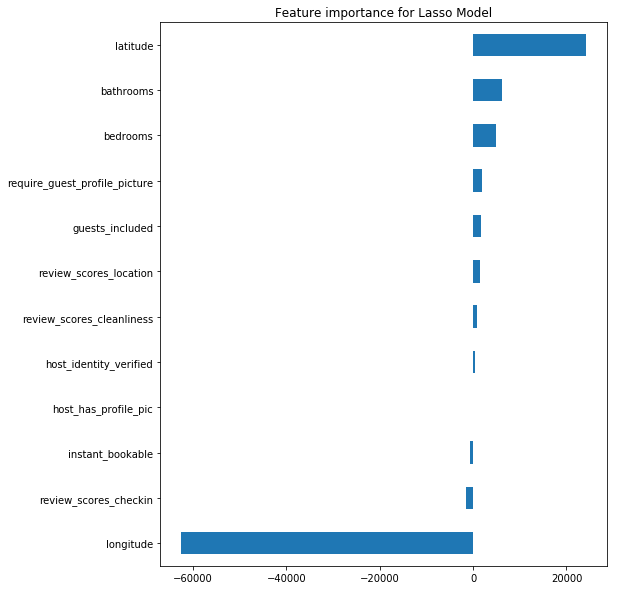

In [361]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance for Lasso Model")

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.1597038467860512
R^2 score for test: 0.10845508668545034


In [363]:
DA1 = df_sel.copy()

In [364]:
DA1 = df_sel.drop(['cancellation_policy','bed_type','room_type','neighbourhood_group_cleansed','property_type','last_scraped','host_name','host_since','host_about','neighbourhood_cleansed','amenities','first_review','last_review','listing_duration','hosting_duration','host_about_len'],axis =1)

In [365]:
dA1C = DA1.drop(['review_scores_communication','beds','require_guest_phone_verification','accommodates','review_scores_accuracy','review_scores_value','price'],axis=1)

In [366]:
dA1C.head()

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_location,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,price_per_person
1,3831,0,1,1,40.68514,-73.95976,1.0,1.0,50000.0,0.0,1,0.0,1,279,9.0,10.0,10.0,0,0,1,2966.666667
3,5099,0,1,0,40.74767,-73.97500,1.0,1.0,30000.0,12500.0,2,10000.0,3,75,9.0,10.0,9.0,0,1,1,10000.000000
5,5178,0,1,0,40.76489,-73.98493,1.0,1.0,0.0,1500.0,1,1200.0,2,443,7.0,9.0,10.0,0,0,1,3950.000000
6,5203,0,1,1,40.80178,-73.96723,1.0,1.0,0.0,0.0,1,0.0,2,118,10.0,10.0,10.0,0,1,1,7900.000000
7,5222,0,1,1,40.72764,-73.97949,1.0,1.0,50000.0,7500.0,2,1500.0,30,94,9.0,10.0,10.0,0,0,1,5800.000000


In [367]:
dA1n = DA1[['review_scores_communication','beds','require_guest_phone_verification','accommodates','review_scores_accuracy','review_scores_value']]

In [368]:
dA1n.head()

,review_scores_communication,beds,require_guest_phone_verification,accommodates,review_scores_accuracy,review_scores_value
1,9.0,4.0,0,3,9.0,9.0
3,10.0,1.0,1,2,10.0,9.0
5,9.0,1.0,0,2,8.0,8.0
6,10.0,1.0,1,1,10.0,10.0
7,10.0,1.0,0,2,9.0,9.0


In [369]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(dA1n)

In [370]:
dA1n = pd.DataFrame(x_scaled)
dA1n.head()

,0,1,2,3,4,5
0,-1.027311,2.108455,-0.165489,0.048210,-0.737430,-0.429856
1,0.342413,-0.501069,6.042691,-0.477762,0.457706,-0.429856
2,-1.027311,-0.501069,-0.165489,-0.477762,-1.932565,-1.520737
3,0.342413,-0.501069,6.042691,-1.003733,0.457706,0.661024
4,0.342413,-0.501069,-0.165489,-0.477762,-0.737430,-0.429856


In [371]:
dA1C.reset_index(inplace=True)
dA1C.shape

(37214, 22)

In [372]:
DA1=pd.concat([dA1n,dA1C],axis=1)
DA1.tail()
DA1.shape

(37214, 28)

In [373]:
DA1.isnull().sum()

0                                 0
1                                 0
2                                 0
3                                 0
4                                 0
5                                 0
index                             0
id                                0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
bathrooms                         0
bedrooms                          0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
number_of_reviews                 0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_location            0
instant_bookable                  0
require_guest_profile_picture     0
calculated_host_listings_count    0
price_per_person            

In [374]:
DA1.set_index('index', inplace=True)

In [375]:
DA1.head()

,0,1,2,3,4,5,id,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_location,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,price_per_person
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.027311,2.108455,-0.165489,0.048210,-0.737430,-0.429856,3831,0,1,1,40.68514,-73.95976,1.0,1.0,50000.0,0.0,1,0.0,1,279,9.0,10.0,10.0,0,0,1,2966.666667
3,0.342413,-0.501069,6.042691,-0.477762,0.457706,-0.429856,5099,0,1,0,40.74767,-73.97500,1.0,1.0,30000.0,12500.0,2,10000.0,3,75,9.0,10.0,9.0,0,1,1,10000.000000
5,-1.027311,-0.501069,-0.165489,-0.477762,-1.932565,-1.520737,5178,0,1,0,40.76489,-73.98493,1.0,1.0,0.0,1500.0,1,1200.0,2,443,7.0,9.0,10.0,0,0,1,3950.000000
6,0.342413,-0.501069,6.042691,-1.003733,0.457706,0.661024,5203,0,1,1,40.80178,-73.96723,1.0,1.0,0.0,0.0,1,0.0,2,118,10.0,10.0,10.0,0,1,1,7900.000000
7,0.342413,-0.501069,-0.165489,-0.477762,-0.737430,-0.429856,5222,0,1,1,40.72764,-73.97949,1.0,1.0,50000.0,7500.0,2,1500.0,30,94,9.0,10.0,10.0,0,0,1,5800.000000


In [376]:
X = DA1.drop([5], axis=1)
y= DA1[5]

In [377]:
X.head()

,0,1,2,3,4,id,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_location,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,price_per_person
index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.027311,2.108455,-0.165489,0.048210,-0.737430,3831,0,1,1,40.68514,-73.95976,1.0,1.0,50000.0,0.0,1,0.0,1,279,9.0,10.0,10.0,0,0,1,2966.666667
3,0.342413,-0.501069,6.042691,-0.477762,0.457706,5099,0,1,0,40.74767,-73.97500,1.0,1.0,30000.0,12500.0,2,10000.0,3,75,9.0,10.0,9.0,0,1,1,10000.000000
5,-1.027311,-0.501069,-0.165489,-0.477762,-1.932565,5178,0,1,0,40.76489,-73.98493,1.0,1.0,0.0,1500.0,1,1200.0,2,443,7.0,9.0,10.0,0,0,1,3950.000000
6,0.342413,-0.501069,6.042691,-1.003733,0.457706,5203,0,1,1,40.80178,-73.96723,1.0,1.0,0.0,0.0,1,0.0,2,118,10.0,10.0,10.0,0,1,1,7900.000000
7,0.342413,-0.501069,-0.165489,-0.477762,-0.737430,5222,0,1,1,40.72764,-73.97949,1.0,1.0,50000.0,7500.0,2,1500.0,30,94,9.0,10.0,10.0,0,0,1,5800.000000


In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26049, 26)
(11165, 26)
(11165,)


In [379]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.5944481320264539
R^2 score for test: 0.5670377055436782


In [380]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      5   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     2032.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:19   Log-Likelihood:                -36354.
No. Observations:               37214   AIC:                         7.276e+04
Df Residuals:                   37187   BIC:                         7.299e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             56.4265      6.335      8.908      0.000      44.010      68.843
0                                  0.1297      0.005     27.035      0.000       0.120       0.139
1                                 -0.0048      0.005     -0.882      0.378      -0.016       0.006
2                                  0.0067      0.006      1.212      0.225      -0.004       0.018
3                                 -0.0283      0.006     -4.776      0.000      -0.040      -0.017
4                                  0.3517      0.005     72.170      0.000       0.342       0.361
id                              8.639e-10   3.69e-10      2.344      0.019    1.42e-10    1.59e-09
host_is_superhost                  0.0701      0.009      8.166      0.000       0.053       0.087
host_has_profile_pic               0.0469      0.079      0.591      0.555      -0.109       0.202
host_identity_verified             0.0333      0.007      4.518      0.000       0.019       0.048
latitude                          -0.3566      0.061     -5.850      0.000      -0.476      -0.237
longitude                          0.6361      0.075      8.482      0.000       0.489       0.783
bathrooms                          0.0512      0.009      5.790      0.000       0.034       0.069
bedrooms                           0.0497      0.007      7.561      0.000       0.037       0.063
security_deposit               -4.671e-07   9.26e-08     -5.043      0.000   -6.49e-07   -2.86e-07
cleaning_fee                   -1.038e-05   7.97e-07    -13.025      0.000   -1.19e-05   -8.82e-06
guests_included                    0.0019      0.004      0.506      0.613      -0.005       0.009
extra_people                   -4.398e-06   1.45e-06     -3.043      0.002   -7.23e-06   -1.57e-06
minimum_nights                    -0.0008      0.000     -4.174      0.000      -0.001      -0.000
number_of_reviews                 -0.0006   7.78e-05     -7.333      0.000      -0.001      -0.000
review_scores_cleanliness          0.2388      0.004     59.310      0.000       0.231       0.247
review_scores_checkin              0.0832      0.006     12.848      0.000       0.071       0.096
review_scores_location             0.2090      0.005     40.388      0.000       0.199       0.219
instant_bookable                  -0.0106      0.007     -1.444      0.149      -0.025       0.004
require_guest_profile_picture     -0.0471      0.036     -1.317      0.188      -0.117       0.023
calculated_host_listings_count    -0.0008      0.000     -7.485      0.000      -0.001      -0.001
price_per_person               -9.056e-07   3.79e-07     -2.391      0.017   -1.65e-06   -1.63e-07
==============================================================================
Omnibus:                    11890.

In [381]:
# We have drubin watson value as 1.975 almost = 2 which means no autocorrelation

In [382]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [383]:
CB = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1467.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:21   Log-Likelihood:                -25497.
No. Observations:               26049   AIC:                         5.105e+04
Df Residuals:                   26022   BIC:                         5.127e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [384]:
checkVIF(CB)

,Features,VIF
0,const,3648808.66
4,3,3.12
2,1,2.64
3,2,2.63
24,require_guest_profile_picture,2.61
5,4,2.20
1,0,2.14
13,bedrooms,2.13
21,review_scores_checkin,1.99
16,guests_included,1.78


In [385]:
CB = X_train.drop(["require_guest_profile_picture"], axis = 1,inplace=True)

In [386]:
CB = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1525.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:24   Log-Likelihood:                -25499.
No. Observations:               26049   AIC:                         5.105e+04
Df Residuals:                   26023   BIC:                         5.126e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [387]:
checkVIF(CB)

,Features,VIF
0,const,3648437.28
4,3,3.12
2,1,2.64
5,4,2.20
1,0,2.14
13,bedrooms,2.13
21,review_scores_checkin,1.99
16,guests_included,1.78
20,review_scores_cleanliness,1.73
15,cleaning_fee,1.66


In [388]:
CB = X_train.drop([3], axis = 1,inplace=True)

In [389]:
CB = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1587.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:26   Log-Likelihood:                -25509.
No. Observations:               26049   AIC:                         5.107e+04
Df Residuals:                   26024   BIC:                         5.127e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [390]:
checkVIF(CB)

,Features,VIF
0,const,3647199.01
4,4,2.20
1,0,2.14
2,1,2.07
12,bedrooms,2.01
20,review_scores_checkin,1.99
19,review_scores_cleanliness,1.73
15,guests_included,1.59
14,cleaning_fee,1.57
5,id,1.52


In [391]:
CB = X_train.drop([4], axis = 1,inplace=True)

In [392]:
CB = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1326.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:28   Log-Likelihood:                -27150.
No. Observations:               26049   AIC:                         5.435e+04
Df Residuals:                   26025   BIC:                         5.454e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [393]:
checkVIF(CB)

,Features,VIF
0,const,3644921.08
2,1,2.07
1,0,2.01
11,bedrooms,2.01
19,review_scores_checkin,1.90
14,guests_included,1.59
13,cleaning_fee,1.57
4,id,1.52
18,review_scores_cleanliness,1.45
20,review_scores_location,1.35


In [394]:
CB = X_train.drop([1], axis = 1,inplace=True)

In [395]:
CB = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1385.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:30   Log-Likelihood:                -27157.
No. Observations:               26049   AIC:                         5.436e+04
Df Residuals:                   26026   BIC:                         5.455e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [396]:
checkVIF(CB)

,Features,VIF
0,const,3644916.65
1,0,2.01
18,review_scores_checkin,1.90
10,bedrooms,1.56
12,cleaning_fee,1.54
3,id,1.52
13,guests_included,1.48
17,review_scores_cleanliness,1.45
19,review_scores_location,1.35
16,number_of_reviews,1.32


In [397]:
CB = X_train.drop([0], axis = 1,inplace=True)

In [398]:
CB = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1311.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:32   Log-Likelihood:                -27855.
No. Observations:               26049   AIC:                         5.575e+04
Df Residuals:                   26027   BIC:                         5.593e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [399]:
checkVIF(CB)

,Features,VIF
0,const,3644823.36
9,bedrooms,1.56
11,cleaning_fee,1.53
2,id,1.51
12,guests_included,1.48
17,review_scores_checkin,1.38
16,review_scores_cleanliness,1.38
15,number_of_reviews,1.32
18,review_scores_location,1.30
10,security_deposit,1.24


In [400]:
X_train.columns

Index([2, 'id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count', 'price_per_person'], dtype='object')

In [401]:
X.head()

,0,1,2,3,4,id,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_location,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,price_per_person
index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.027311,2.108455,-0.165489,0.048210,-0.737430,3831,0,1,1,40.68514,-73.95976,1.0,1.0,50000.0,0.0,1,0.0,1,279,9.0,10.0,10.0,0,0,1,2966.666667
3,0.342413,-0.501069,6.042691,-0.477762,0.457706,5099,0,1,0,40.74767,-73.97500,1.0,1.0,30000.0,12500.0,2,10000.0,3,75,9.0,10.0,9.0,0,1,1,10000.000000
5,-1.027311,-0.501069,-0.165489,-0.477762,-1.932565,5178,0,1,0,40.76489,-73.98493,1.0,1.0,0.0,1500.0,1,1200.0,2,443,7.0,9.0,10.0,0,0,1,3950.000000
6,0.342413,-0.501069,6.042691,-1.003733,0.457706,5203,0,1,1,40.80178,-73.96723,1.0,1.0,0.0,0.0,1,0.0,2,118,10.0,10.0,10.0,0,1,1,7900.000000
7,0.342413,-0.501069,-0.165489,-0.477762,-0.737430,5222,0,1,1,40.72764,-73.97949,1.0,1.0,50000.0,7500.0,2,1500.0,30,94,9.0,10.0,10.0,0,0,1,5800.000000


In [402]:
# X = DA1[[1,2,3,4,'id','host_is_superhost','host_has_profile_pic','host_identity_verified','latitude','longitude','bathrooms','bedrooms','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','number_of_reviews','review_scores_cleanliness','review_scores_checkin','review_scores_location','instant_bookable','require_guest_profile_picture','calculated_host_listings_count','price_per_person']]
# y= DA1[5]

In [403]:
X = DA1[[2, 'id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count', 'price_per_person']]
y= DA1[5]

In [404]:
X_C = sm.add_constant(X)
model = sm.OLS(y,X_C).fit()
model.pvalues

const                             7.394636e-21
2                                 9.037889e-01
id                                2.269529e-01
host_is_superhost                 5.214066e-32
host_has_profile_pic              2.751545e-01
host_identity_verified            1.596959e-14
latitude                          6.332797e-12
longitude                         1.971661e-20
bathrooms                         1.544975e-04
bedrooms                          4.345289e-07
security_deposit                  4.113549e-07
cleaning_fee                      4.302200e-67
guests_included                   2.330505e-01
extra_people                      1.350775e-03
minimum_nights                    4.030352e-07
number_of_reviews                 3.097649e-17
review_scores_cleanliness         0.000000e+00
review_scores_checkin             0.000000e+00
review_scores_location            0.000000e+00
instant_bookable                  1.194217e-02
calculated_host_listings_count    3.641805e-18
price_per_per

In [405]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_n = cols
print(selected_features_n)

['host_is_superhost', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count']


In [406]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26049, 21)
(11165, 21)
(11165,)


In [407]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.5100940941641163
R^2 score for test: 0.4913036826660541


In [408]:
# RFE: (Recursive feature elimination)

In [409]:
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.512220


In [410]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location'], dtype='object')


In [411]:
X = DA1[[4, 'host_has_profile_pic', 'latitude', 'longitude', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location']]
y= DA1[5]

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26049, 7)
(11165, 7)
(11165,)


In [413]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.5701038797095352
R^2 score for test: 0.5701769771714306


In [414]:
X = DA1[[4, 'host_has_profile_pic', 'latitude', 'longitude', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location']]
y= DA1[5]

In [415]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000689
Best score using built-in LassoCV: 0.569785


In [416]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

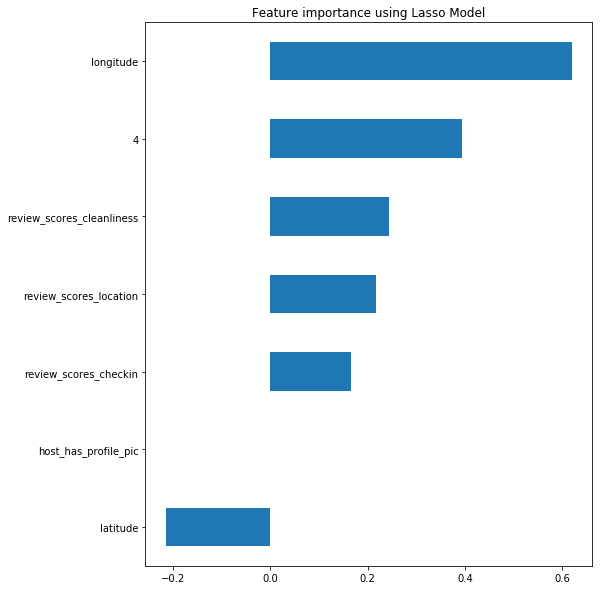

In [417]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26049, 7)
(11165, 7)
(11165,)


In [419]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.5701038797095352
R^2 score for test: 0.5701769771714306


In [420]:
X = df_sel[['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']]
y = df_sel['price']

In [421]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [422]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [423]:
regressor.intercept_ 

-2236210.4081675345

In [424]:
regressor.coef_ 

array([ 1.62658807e-05, -5.76194342e+00,  9.54681635e+02,  2.48812633e+00,
        1.13746865e+04, -2.37842349e+04,  4.95927221e+03,  4.30015714e+03,
        2.07962712e-02,  5.83364161e-01,  1.39884541e+03, -1.78301032e-01,
       -3.14486491e+01, -1.94011792e+00,  2.90358470e+02, -7.26289972e+02,
        8.03605035e+02,  2.34917681e+02,  2.03288725e+03,  9.22253247e+00,
        1.42525487e+00])

In [425]:
predictivebalance = regressor.predict(X_train)

In [426]:
print("R^2:",regressor.score(X_train, y_train))

R^2: 0.6473205521845811


In [427]:
MAE = metrics.mean_absolute_error(predictivebalance,y_train)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 4659.795426563206


In [428]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, predictivebalance)))

RMSE: 11388.59003600418


In [429]:
X = df_sel[['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'instant_bookable', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']]
y = df_sel['price']
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3721.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:56:14   Log-Likelihood:            -4.0001e+05
No. Observations:               37214   AIC:                         8.001e+05
Df Residuals:                   37192   BIC:                         8.002e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -2.027e+06   1.11e+05    -18.259      0.000   -2.24e+06   -1.81e+06
id                              2.337e-05   6.44e-06      3.631      0.000    1.08e-05     3.6e-05
host_is_superhost               -115.2368    150.235     -0.767      0.443    -409.702     179.229
host_has_profile_pic             559.2742   1390.988      0.402      0.688   -2167.101    3285.650
host_identity_verified            63.1736    128.941      0.490      0.624    -189.555     315.902
latitude                        1.028e+04   1068.495      9.622      0.000    8187.026    1.24e+04
longitude                      -2.157e+04   1314.212    -16.413      0.000   -2.41e+04    -1.9e+04
bathrooms                       4678.7060    153.670     30.446      0.000    4377.508    4979.904
bedrooms                        4408.5661     98.469     44.771      0.000    4215.563    4601.569
security_deposit                   0.0178      0.002     10.951      0.000       0.015       0.021
cleaning_fee                       0.5613      0.013     41.740      0.000       0.535       0.588
guests_included                 1458.2386     59.231     24.619      0.000    1342.144    1574.333
extra_people                      -0.2494      0.025     -9.909      0.000      -0.299      -0.200
minimum_nights                   -29.1626      3.267     -8.925      0.000     -35.567     -22.758
number_of_reviews                  0.0325      1.358      0.024      0.981      -2.629       2.694
review_scores_cleanliness        263.4751     63.186      4.170      0.000     139.628     387.322
review_scores_checkin           -556.3764     95.503     -5.826      0.000    -743.565    -369.188
review_scores_location           542.9297     87.676      6.192      0.000     371.081     714.778
instant_bookable                 137.5716    128.748      1.069      0.285    -114.779     389.922
require_guest_profile_picture   1516.2322    386.234      3.926      0.000     759.202    2273.262
calculated_host_listings_count    10.1830      1.884      5.406      0.000       6.491      13.875
price_per_person                   1.5755      0.007    238.292      0.000       1.563       1.588
==============================================================================
Omnibus:                    71257.541   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1568830368.361
Skew:                          13.914   Prob(JB):                         0.00
Kurtosis:                    1008.482   Cond. No.                     4.22e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

In [430]:
# final model without transformation

In [431]:
X = DA1[[4, 'host_has_profile_pic', 'latitude', 'longitude', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location']]
y= DA1[5]
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      5   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     7052.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:56:16   Log-Likelihood:                -37092.
No. Observations:               37214   AIC:                         7.420e+04
Df Residuals:                   37206   BIC:                         7.427e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        84.5723      6.183     13.678      0.000      72.453      96.691
4                             0.3925      0.005     81.871      0.000       0.383       0.402
host_has_profile_pic          0.0618      0.081      0.765      0.444      -0.097       0.220
latitude                     -0.4676      0.062     -7.595      0.000      -0.588      -0.347
longitude                     0.9680      0.073     13.216      0.000       0.824       1.112
review_scores_cleanliness     0.2432      0.004     60.557      0.000       0.235       0.251
review_scores_checkin         0.1641      0.006     27.737      0.000       0.153       0.176
review_scores_location        0.2237      0.005     43.164      0.000       0.214       0.234
==============================================================================
Omnibus:                    12240.347   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134003.591
Skew:                          -1.265   Prob(JB):                         0.00
Kurtosis:                      11.945   Cond. No.                     1.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""